In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collections

In [2]:
now = datetime.now()

start=datetime(now.year-10, now.month, now.day)
end=now
ticker='AAPL'
df=yf.download(ticker, start, end)
df

C:\Users\PRASHANT PAL\AppData\Local\Temp\ipykernel_15316\3168325329.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600
2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000
2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400
2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200
...,...,...,...,...,...
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600
2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000
2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400
2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(2514, 5)

In [6]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [7]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,107.945635,109.022786,106.751647,107.839225,1.053107e+08
std,70.194311,70.874219,69.421278,70.112401,5.921646e+07
min,20.624058,20.927678,20.425443,20.546428,2.323470e+07
25%,40.505465,40.874366,40.246915,40.546930,6.485765e+07
50%,112.193275,113.603711,110.669759,112.237036,9.149395e+07
75%,168.667484,170.106376,167.116444,168.358485,1.289473e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600
2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000
2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400
2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200


In [11]:
df=df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
1,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600
2,2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000
3,2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400
4,2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200


Text(0, 0.5, 'Close price')

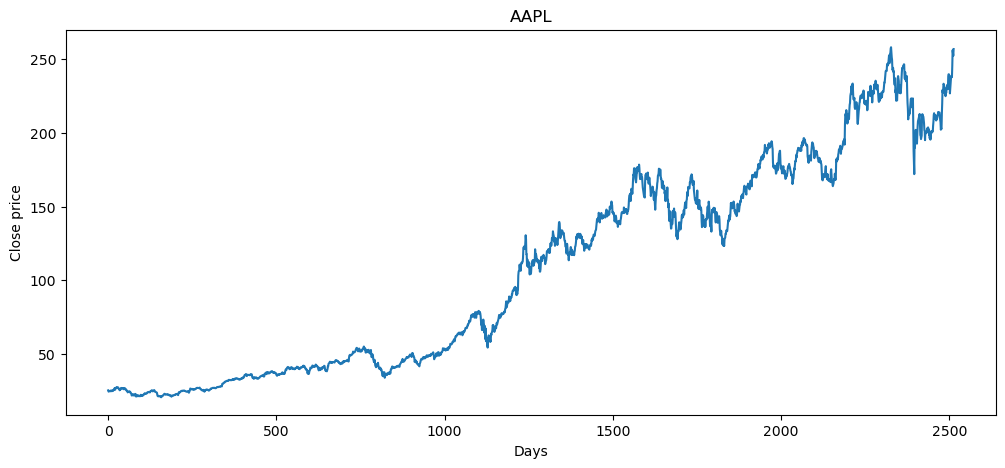

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [14]:
temp_df=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [15]:
df1=pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [16]:
df1['MA_5']=df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days Moving Average

In [17]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN
1,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600,NaN
2,2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000,NaN
3,2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400,NaN
4,2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200,NaN


In [18]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN
1,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600,NaN
2,2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000,NaN
3,2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400,NaN
4,2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200,NaN
...,...,...,...,...,...,...,...
98,2016-02-18,21.842554,22.439332,21.803978,22.427986,156084000,NaN
99,2016-02-19,21.792645,21.956022,21.738186,21.783568,141496800,24.478299
100,2016-02-22,21.983244,21.987783,21.765409,21.853904,137123200,24.445450


Text(0, 0.5, 'Close price')

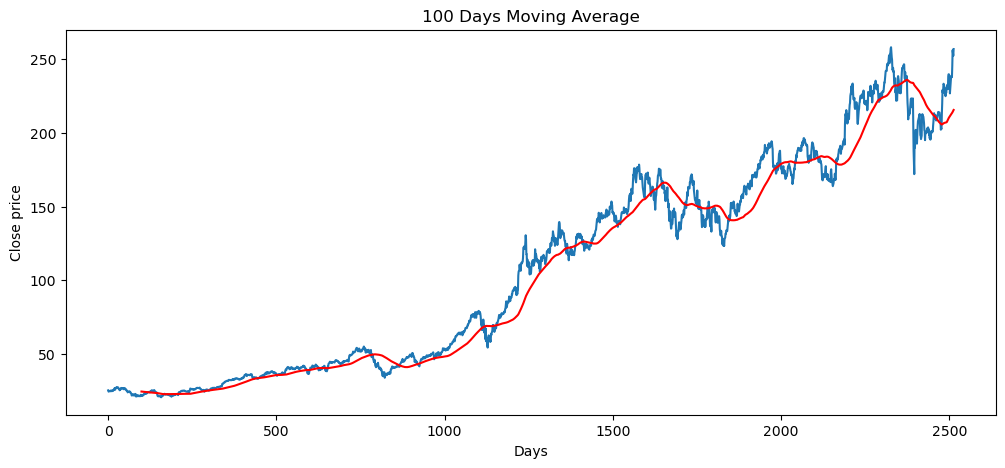

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')


### 200 Days Moving Average

In [20]:
df['MA_200']=df.Close.AAPL.rolling(200).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN,NaN
1,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600,NaN,NaN
2,2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000,NaN,NaN
3,2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400,NaN,NaN
4,2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,213.745181,221.217799
2510,2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,214.199038,221.304487
2511,2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200,214.623527,221.367678


In [21]:
df.head(2515)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN,NaN
1,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600,NaN,NaN
2,2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000,NaN,NaN
3,2015-10-01,24.625429,24.634418,24.115301,24.510819,255716400,NaN,NaN
4,2015-10-02,24.805208,24.946786,24.169236,24.272610,232079200,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,213.745181,221.217799
2510,2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,214.199038,221.304487
2511,2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200,214.623527,221.367678


Text(0, 0.5, 'Close price')

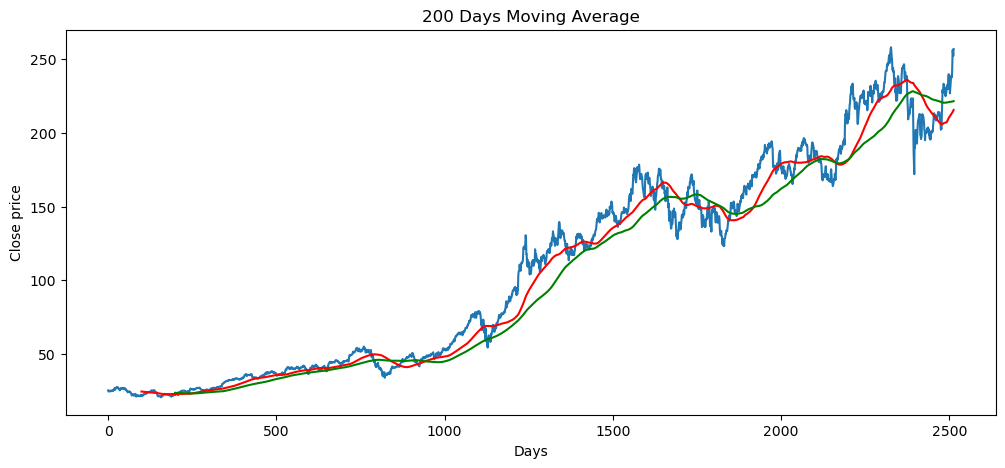

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')

### Calculating % change in each trading session

In [23]:
df['Percentage Change']=df.Close.AAPL.pct_change()
df[['Close','Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,25.268141,NaN
1,24.508568,-0.030061
2,24.787228,0.011370
3,24.625429,-0.006527
4,24.805208,0.007301
...,...,...
2509,245.500000,0.032033
2510,256.079987,0.043096
2511,254.429993,-0.006443


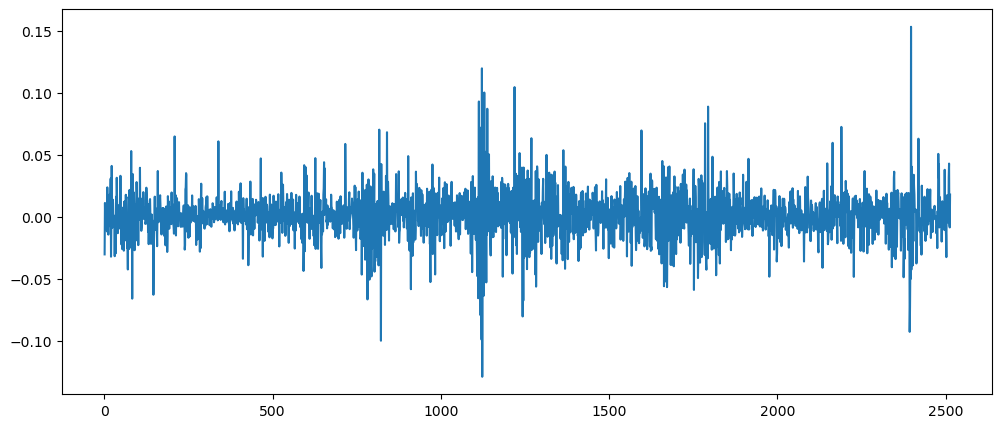

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])

### Data Preprocessing

In [25]:
df.shape

(2514, 9)

In [26]:
# Splitting data and training and testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.268141
1        24.508568
2        24.787228
3        24.625429
4        24.805208
...            ...
1754    150.002136
1755    148.358093
1756    152.079346
1757    154.461746
1758    151.331161

[1759 rows x 1 columns]
Ticker        AAPL
1759    150.366409
1760    148.092316
1761    148.426987
1762    149.401627
1763    147.511475
...            ...
2509    245.500000
2510    256.079987
2511    254.429993
2512    252.309998
2513    256.869995

[755 rows x 1 columns]


In [27]:
data_training

Ticker,AAPL
0,25.268141
1,24.508568
2,24.787228
3,24.625429
4,24.805208
...,...
1754,150.002136
1755,148.358093
1756,152.079346
1757,154.461746


In [28]:
data_testing

Ticker,AAPL
1759,150.366409
1760,148.092316
1761,148.426987
1762,149.401627
1763,147.511475
...,...
2509,245.500000
2510,256.079987
2511,254.429993
2512,252.309998


In [29]:
# Scale down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02942663],
       [0.02461369],
       [0.02637938],
       ...,
       [0.83294931],
       [0.84804508],
       [0.82820854]], shape=(1759, 1))

In [31]:
type(data_training_array)

numpy.ndarray

### Sequence Creation

In [32]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
    

In [33]:
x_train.ndim

3

In [34]:
y_train.ndim

1

In [35]:
x_train.shape

(1659, 100, 1)

In [36]:
y_train.shape

(1659,)

### Model Building

In [ ]:
import tensorflow as tf
print(tf,__version__)

In [38]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [43]:
model=Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### Model Training

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - loss: 5.2503e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 1.4155e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 1.6248e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 1.8639e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 1.5162e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 1.5593e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 1.7975e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 1.5625e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 1.9903e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 1.5077e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 1.7396e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 2.0246e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 1.6399e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 1

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [47]:
# Save the trained model
model.save('stock_prediction_model.keras')

### Prepare Test Data

In [50]:
data_training.tail(100)

Ticker,AAPL
1659,154.757431
1660,155.061768
1661,156.553864
1662,162.973862
1663,153.893555
...,...
1754,150.002136
1755,148.358093
1756,152.079346
1757,154.461746


In [48]:
data_testing

Ticker,AAPL
1759,150.366409
1760,148.092316
1761,148.426987
1762,149.401627
1763,147.511475
...,...
2509,245.500000
2510,256.079987
2511,254.429993
2512,252.309998


In [51]:
past_100_days=data_training.tail(100)
past_100_days

Ticker,AAPL
1659,154.757431
1660,155.061768
1661,156.553864
1662,162.973862
1663,153.893555
...,...
1754,150.002136
1755,148.358093
1756,152.079346
1757,154.461746


In [52]:
final_df=pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,154.757431
1,155.061768
2,156.553864
3,162.973862
4,153.893555
...,...
850,245.500000
851,256.079987
852,254.429993
853,252.309998


In [53]:
input_data=scaler.fit_transform(final_df)
input_data

array([[2.33463460e-01],
       [2.35720775e-01],
       [2.46787897e-01],
       [2.94406082e-01],
       [2.27055947e-01],
       [2.32452224e-01],
       [1.94389117e-01],
       [2.12253873e-01],
       [1.53846981e-01],
       [1.25117011e-01],
       [1.58294722e-01],
       [1.46846647e-01],
       [1.73826222e-01],
       [1.12429421e-01],
       [8.71272418e-02],
       [8.88769575e-02],
       [1.29127663e-01],
       [1.09075309e-01],
       [1.10242050e-01],
       [1.34013059e-01],
       [1.76742905e-01],
       [1.70909426e-01],
       [1.69961569e-01],
       [1.88190868e-01],
       [1.45680019e-01],
       [1.51221728e-01],
       [1.69961569e-01],
       [1.64492745e-01],
       [1.25700551e-01],
       [8.55229585e-02],
       [4.72409665e-02],
       [5.36577604e-02],
       [7.31267997e-02],
       [3.39700065e-02],
       [4.49074841e-02],
       [7.63352532e-02],
       [7.25438252e-02],
       [9.38356926e-02],
       [1.18554671e-01],
       [1.18554671e-01],


In [54]:
input_data.shape

(855, 1)

In [56]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [57]:
x_test,y_test=np.array(x_test), np.array(y_test)

In [60]:
x_test[0].shape

(100, 1)

### Model Prediction

In [61]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


In [62]:
y_predicted

array([[0.22104485],
       [0.21171586],
       [0.19717148],
       [0.19411296],
       [0.1985509 ],
       [0.19063717],
       [0.15147302],
       [0.11719241],
       [0.1251746 ],
       [0.14728771],
       [0.1574878 ],
       [0.15588725],
       [0.12944362],
       [0.12058661],
       [0.11147322],
       [0.10520151],
       [0.12444042],
       [0.11163498],
       [0.12394145],
       [0.13605437],
       [0.14103206],
       [0.14024374],
       [0.15813757],
       [0.1759878 ],
       [0.19643071],
       [0.18845712],
       [0.16223384],
       [0.20671256],
       [0.21256664],
       [0.19910988],
       [0.16619225],
       [0.1253037 ],
       [0.10972217],
       [0.10759936],
       [0.11015187],
       [0.09027604],
       [0.13695402],
       [0.17198992],
       [0.1770141 ],
       [0.18591268],
       [0.18285231],
       [0.19082862],
       [0.1967677 ],
       [0.18222135],
       [0.18739225],
       [0.19433615],
       [0.18187843],
       [0.157

In [63]:
y_test

array([2.00894528e-01, 1.84027200e-01, 1.86509511e-01, 1.93738575e-01,
       1.79719007e-01, 1.25976929e-01, 9.47244713e-02, 1.25757932e-01,
       1.52409973e-01, 1.54600400e-01, 1.47517673e-01, 1.08525496e-01,
       1.10935033e-01, 1.00420102e-01, 9.57469119e-02, 1.29701017e-01,
       9.60392480e-02, 1.25465822e-01, 1.35250310e-01, 1.36053413e-01,
       1.32621662e-01, 1.60953136e-01, 1.76871135e-01, 1.97973884e-01,
       1.76141257e-01, 1.42917256e-01, 2.22800267e-01, 2.05275495e-01,
       1.85633408e-01, 1.44596915e-01, 9.96902234e-02, 9.77151723e-02,
       1.01664709e-01, 1.05906920e-01, 7.20431304e-02, 1.59811406e-01,
       1.80509887e-01, 1.70124091e-01, 1.82996724e-01, 1.73854064e-01,
       1.87970512e-01, 1.92139272e-01, 1.68149040e-01, 1.84020863e-01,
       1.90530235e-01, 1.68880729e-01, 1.40429174e-01, 1.18121430e-01,
       1.68295491e-01, 1.70343428e-01, 1.66686341e-01, 1.58056032e-01,
       1.30847839e-01, 1.16439281e-01, 1.28946127e-01, 1.25362492e-01,
      

In [64]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [65]:
y_predicted

array([153.08311 , 151.82536 , 149.86446 , 149.4521  , 150.05043 ,
       148.98349 , 143.7033  , 139.08148 , 140.15765 , 143.139   ,
       144.5142  , 144.29842 , 140.73323 , 139.53911 , 138.31041 ,
       137.46484 , 140.05869 , 138.33223 , 139.99141 , 141.62451 ,
       142.2956  , 142.18933 , 144.60182 , 147.00842 , 149.76459 ,
       148.68958 , 145.15408 , 151.1508  , 151.94008 , 150.12581 ,
       145.68776 , 140.17506 , 138.07433 , 137.78813 , 138.13228 ,
       135.45256 , 141.74579 , 146.46942 , 147.1468  , 148.34651 ,
       147.93391 , 149.0093  , 149.81003 , 147.84885 , 148.546   ,
       149.4822  , 147.80261 , 144.5759  , 141.46721 , 144.82716 ,
       146.49162 , 146.65962 , 145.87202 , 143.1378  , 140.85939 ,
       141.16063 , 141.07751 , 142.52437 , 143.75497 , 142.72815 ,
       138.03352 , 134.97563 , 132.61623 , 131.69727 , 133.27364 ,
       132.1493  , 131.3503  , 129.9867  , 127.139626, 127.88059 ,
       128.59221 , 126.177574, 125.68978 , 124.85519 , 127.018

In [66]:
y_test

array([150.3664093 , 148.09231567, 148.42698669, 149.40162659,
       147.51147461, 140.26583862, 136.05230713, 140.23631287,
       143.8296051 , 144.12492371, 143.17001343, 137.91299438,
       138.237854  , 136.82020569, 136.19015503, 140.76792908,
       136.22956848, 140.19692993, 141.51609802, 141.62437439,
       141.16169739, 144.98141479, 147.1275177 , 149.97264099,
       147.02911377, 142.54977417, 153.3197937 , 150.95706177,
       148.30886841, 142.77622986, 136.72180176, 136.45552063,
       136.98800659, 137.55995178, 132.99435425, 144.82748413,
       147.61810303, 146.21786499, 147.9533844 , 146.7207489 ,
       148.6239624 , 149.18600464, 145.95158386, 148.09146118,
       148.96907043, 146.05023193, 142.21432495, 139.20674133,
       145.97132874, 146.24743652, 145.75437927, 144.59082031,
       140.92254639, 138.97994995, 140.66615295, 140.18299866,
       142.48059082, 143.44696045, 141.21838379, 134.60168457,
       132.63935852, 130.52912903, 130.46011353, 133.56

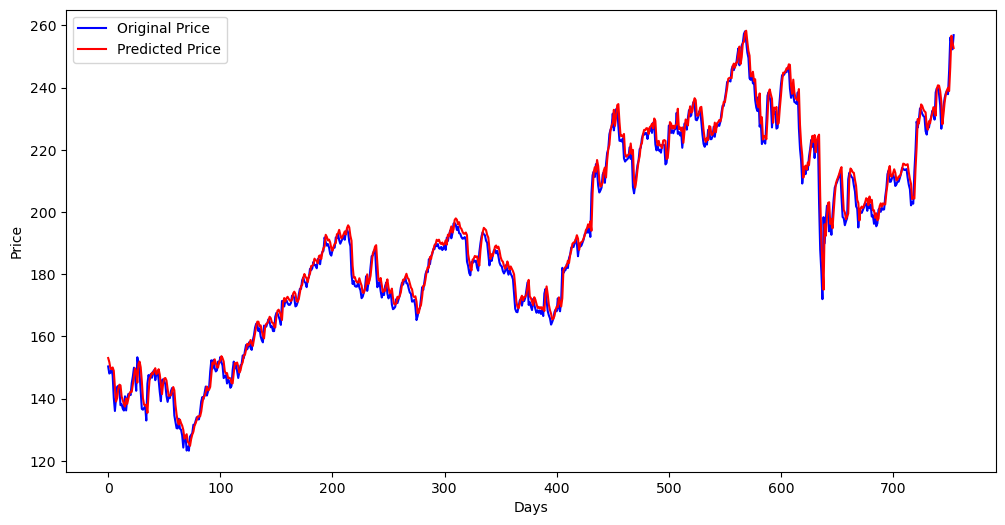

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

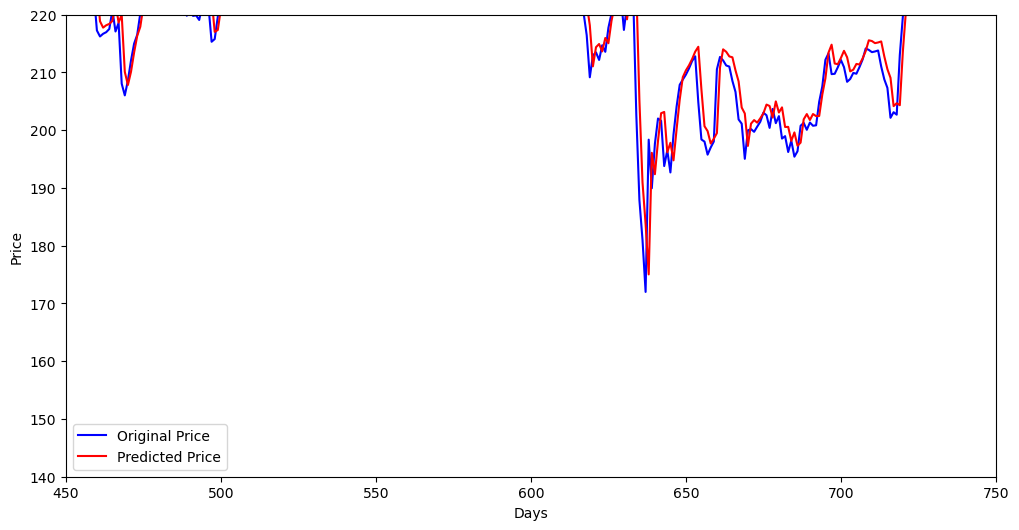

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)



### Model Evaluation

In [71]:
# Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
mse=mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (RMSE): {mse}")

Mean Squared Error (RMSE): 12.467730242690454


In [75]:
# Root mean Squared Erro (RMSE)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 3.5309673239341164


In [76]:
# R-Shaped
r2=r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9877614958549541
